## **Sharonne Kemboi**
## **Datathon Challenge Dphi**



## Data Description :

* HHI: Household income
* HHDL: Household debt level
* Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.
* PoliticalParty: Name of the political party
* CollegeGrads: Grade in College out of 5
* AHHAge: Average household age
* cars: number of cars in house
* Filed in YYYY: Tax filed in given year YYYY

## **Import Library**

In [ ]:
# Import library used

import pandas as pd  # package for data analysis
import numpy as np    # package for numerical computations

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn.metrics import  accuracy_score    # for model evaluation

# **Load Data**



1.   Training data




In [ ]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )


2.   Test Data



In [ ]:
new_test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

## **EDA**

1. Check and Prepare Data Training

In [ ]:
# Take a look at the first five observations
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [ ]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [ ]:
tax_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


* ### Separating input and Output (for training data)





In [ ]:
x = tax_data.iloc[:,1:10]
y = tax_data['PoliticalParty']

2. Check and Prepare Data Test

In [ ]:
new_test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [ ]:
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     201 non-null    int64
 1   HHI            201 non-null    int64
 2   HHDL           201 non-null    int64
 3   Married        201 non-null    int64
 4   CollegGrads    201 non-null    int64
 5   AHHAge         201 non-null    int64
 6   Cars           201 non-null    int64
 7   Filed in 2017  201 non-null    int64
 8   Filed in 2016  201 non-null    int64
 9   Filed in 2015  201 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


In [ ]:
new_test_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,503.532338,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,296.674907,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,4.000000,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,510.000000,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,748.000000,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,990.000000,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [ ]:
# Input test data to variable x_test 
x_test = new_test_data.iloc[:,1:10]
x_test.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,253274,-633752,2,1,94,3,0,1,1
1,47107,322850,0,1,30,2,1,1,0
2,111874,300583,0,2,46,3,0,1,1
3,96670,107419,0,3,77,5,0,0,0
4,128669,341273,0,0,92,4,1,1,1


### **EDA & Data Preprocessing** 

1. Training Data



In [ ]:
x.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,183414,-12402,1,2,28,1,0,0,1
1,129786,700251,2,5,63,3,0,0,0
2,268343,493411,2,4,44,1,1,0,1
3,290506,-433408,1,1,28,5,1,0,1
4,90108,907135,1,3,57,5,1,1,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHI            803 non-null    int64
 1   HHDL           803 non-null    int64
 2   Married        803 non-null    int64
 3   CollegGrads    803 non-null    int64
 4   AHHAge         803 non-null    int64
 5   Cars           803 non-null    int64
 6   Filed in 2017  803 non-null    int64
 7   Filed in 2016  803 non-null    int64
 8   Filed in 2015  803 non-null    int64
dtypes: int64(9)
memory usage: 56.6 KB


In [ ]:
x.shape

(803, 9)

In [ ]:
x.isnull().sum()

HHI              0
HHDL             0
Married          0
CollegGrads      0
AHHAge           0
Cars             0
Filed in 2017    0
Filed in 2016    0
Filed in 2015    0
dtype: int64

**Observations:**

1. There are 803 observations (train) divided into 9 columns.
2. There are no missing values in the dataset.


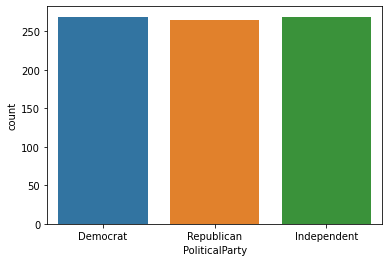

In [ ]:
sns.countplot(y)
plt.show()

from the diagram, we can say that the output class is balanced

In [ ]:
categorical_data = x.drop(numeric_data.columns, axis=1)    # dropping the numerical columns from the dataframe 'data'
categorical_data.nunique()   # nunique() return you the number of unique values in each column/feature

Married          3
Filed in 2017    2
Filed in 2016    2
Filed in 2015    2
dtype: int64

In [ ]:
x_new.head()

,HHI,HHDL,CollegGrads,AHHAge,Cars,Married_0,Married_1,Married_2,Filed in 2015_0,Filed in 2015_1,Filed in 2016_0,Filed in 2016_1,Filed in 2017_0,Filed in 2017_1
0,183414,-12402,2,28,1,0,1,0,0,1,1,0,1,0
1,129786,700251,5,63,3,0,0,1,1,0,1,0,1,0
2,268343,493411,4,44,1,0,0,1,0,1,1,0,0,1
3,290506,-433408,1,28,5,0,1,0,0,1,1,0,0,1
4,90108,907135,3,57,5,0,1,0,1,0,0,1,0,1


In [ ]:
y.head()

0       Democrat
1     Republican
2    Independent
3     Republican
4       Democrat
Name: PoliticalParty, dtype: object

In [ ]:
y.isnull().sum()

0

In [ ]:
y.value_counts()

Independent    269
Democrat       269
Republican     265
Name: PoliticalParty, dtype: int64

### 2. Testing Data

In [ ]:
x_test.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,253274,-633752,2,1,94,3,0,1,1
1,47107,322850,0,1,30,2,1,1,0
2,111874,300583,0,2,46,3,0,1,1
3,96670,107419,0,3,77,5,0,0,0
4,128669,341273,0,0,92,4,1,1,1


In [ ]:
x_test.isnull().sum()

HHI              0
HHDL             0
Married          0
CollegGrads      0
AHHAge           0
Cars             0
Filed in 2017    0
Filed in 2016    0
Filed in 2015    0
dtype: int64

In [ ]:
x_test_new = pd.get_dummies(x_test, columns=['Married', 'Filed in 2015','Filed in 2016','Filed in 2017'])

In [ ]:
x_test_new.head()

,HHI,HHDL,CollegGrads,AHHAge,Cars,Married_0,Married_1,Married_2,Filed in 2015_0,Filed in 2015_1,Filed in 2016_0,Filed in 2016_1,Filed in 2017_0,Filed in 2017_1
0,253274,-633752,1,94,3,0,0,1,0,1,0,1,1,0
1,47107,322850,1,30,2,1,0,0,1,0,0,1,0,1
2,111874,300583,2,46,3,1,0,0,0,1,0,1,1,0
3,96670,107419,3,77,5,1,0,0,1,0,1,0,1,0
4,128669,341273,0,92,4,1,0,0,0,1,0,1,0,1


#**Model Building**

1. Logistic Regression Model

In [ ]:
logreg = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
logreg.fit(x_new,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

Training Accuracy :


In [ ]:
import sklearn
y_pred=logreg.predict(x_new)
sklearn.metrics.accuracy_score(y,y_pred)

0.34993773349937735

2. Random Forest

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(x_new, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Model Evaluation

Training Accuracy :

In [ ]:
y_pred=forest.predict(x_new)
sklearn.metrics.accuracy_score(y,y_pred)

0.7434620174346201

## **Feature Selection** using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the classifier
rf_clf.fit(x_new, y)



## **Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 25, 30],
    'n_estimators': [100, 300, 500, 1000]}

In [ ]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_new, y)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   42.1s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 25, 'n_estimators': 500}

Model Evalulation

In [ ]:
y_pred=grid_search.predict(x_new)
sklearn.metrics.accuracy_score(y,y_pred)

1.0

In [ ]:
forest = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=25, bootstrap =False)
forest.fit(x_new, y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=forest.predict(x_new)
sklearn.metrics.accuracy_score(y,y_pred)

1.0

In [ ]:
print(y_pred)

['Democrat' 'Republican' 'Independent' 'Republican' 'Democrat'
 'Independent' 'Democrat' 'Independent' 'Independent' 'Republican'
 'Democrat' 'Independent' 'Independent' 'Republican' 'Democrat'
 'Independent' 'Republican' 'Democrat' 'Independent' 'Independent'
 'Democrat' 'Democrat' 'Democrat' 'Independent' 'Democrat' 'Republican'
 'Independent' 'Republican' 'Republican' 'Democrat' 'Independent'
 'Republican' 'Republican' 'Independent' 'Independent' 'Republican'
 'Democrat' 'Republican' 'Republican' 'Republican' 'Independent'
 'Independent' 'Independent' 'Republican' 'Independent' 'Republican'
 'Democrat' 'Republican' 'Democrat' 'Independent' 'Democrat' 'Independent'
 'Democrat' 'Democrat' 'Independent' 'Independent' 'Democrat'
 'Independent' 'Democrat' 'Independent' 'Democrat' 'Democrat'
 'Independent' 'Republican' 'Democrat' 'Republican' 'Democrat'
 'Independent' 'Republican' 'Independent' 'Independent' 'Independent'
 'Independent' 'Independent' 'Independent' 'Democrat' 'Independent'

In [ ]:
target =forest.predict(x_test_new)

In [ ]:

res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = x_test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index = False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>